In [1]:
%pylab inline
import hmf
from configparser import ConfigParser
import astropy.table as astTab
mMin=13.5;mMax=15
hmfun  =   hmf.MassFunction(Mmin=mMin,Mmax=mMax)
print(hmfun.parameter_values['cosmo_model'])

Populating the interactive namespace from numpy and matplotlib


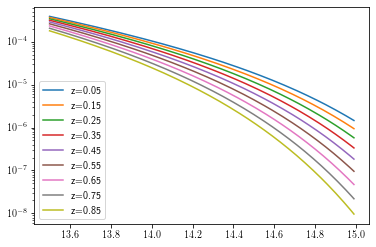

In [28]:
for iz in np.arange(0.05,0.86,0.1):
    hmfun.update(z=iz)
    plt.plot(np.log10(hmfun.m), hmfun.dndlog10m,label='z=%.2f'%iz)
plt.legend()
plt.yscale('log')

In [91]:
zAll=np.array(zAll)
mAll=np.array(mAll)
concAll=6.02*(mAll/1.E13)**(-0.12)*(1.47/(1.+zAll[i]))**(0.16)
raAll=np.random.uniform(low=xMin,high=xMax,size=len(zAll))
decAll=np.random.uniform(low=yMin,high=yMax,size=len(zAll))
cols=(zAll,mAll,concAll,raAll,decAll)
names=('z_cl','M_200','conc','ra','dec')
haloTab=astTab.Table(cols,names=names)
haloTab.write('haloCat.csv')

# For demonstration
halo mass function

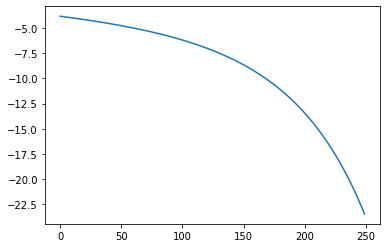

In [28]:
plt.plot(np.log10(hmfun.dndlog10m))